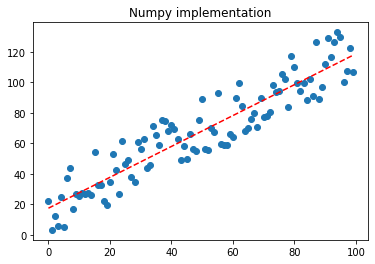

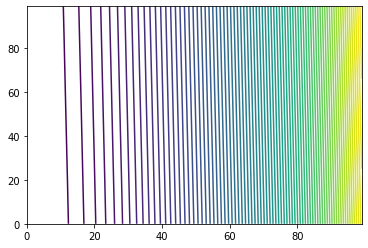

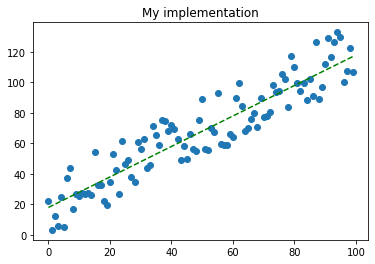

In [1]:
import numpy
from matplotlib import pyplot

"""
h → hypothesis function
se → square error
cf → cost function
t1, t2 → theta one and two
xs → x values
ys → y values
"""

    
def get_axes(n):
    xs = numpy.arange(n)
    deltas = numpy.random.uniform(0, 40, size=[n])
    ys = xs + deltas
    return xs, ys


def plot_axes(xs, ys, hx, line, title):
    pyplot.scatter(xs, ys)
    pyplot.plot(xs, hx, line)
    pyplot.title(title)
    pyplot.show()


def numpy_least_squares_implementation(xs, ys):
    coefficients = numpy.polyfit(xs, ys, deg=1)
    h = numpy.poly1d(coefficients) 
    h_x = h(xs)
    return h_x


def my_least_squares_implementation(xs, ys, n):
    def h(x, _t1, _t2):
        return _t1 * x + _t2

    def cf(t1, t2):
        return sum(
            [
                (h(xs[i], t1, t2) - ys[i]) ** 2
                for i in range(n)
            ]
        ) / 1000000
    
    t1_min = 0
    t2_min = 0
    t1_max = n
    t2_max = n
    t1s = numpy.arange(t1_min, t1_max)
    t2s = numpy.arange(t2_min, t2_max)

    vcf = numpy.vectorize(cf)    
    t12s, t21s = numpy.meshgrid(t1s, t2s)
    square_errors = vcf(t12s, t21s)
    
    pyplot.contour(t1s, t2s, square_errors, n)
    pyplot.title('My cost function')
    pyplot.show()
    
    # C данными нет проблем, по крайней мере мешгрид и вектора работают как должны
    # проблема может быть в алгоритме кост-функции
    # но скорее всего проблема в том, что я неправильно строю график
        
    square_errors = {}
    t1 = t1_min
    while t1 < t1_max:
        t2 = t2_min
    
        while t2 < t2_max:
            error_value = cf(t1, t2)
            square_errors[error_value] = [t1, t2]

            t2 += 1

        t1 += 1
 
    least_square_error = min(square_errors.keys())
    t1, t2 = square_errors[least_square_error]    
    return [h(xs[i], t1, t2) for i in range(n)]


if __name__ == '__main__':
    xs, ys = get_axes(n=100)
    
    numpy_hx = numpy_least_squares_implementation(xs, ys)
    plot_axes(xs, ys, numpy_hx, '--r', 'Numpy implementation') 
    
    my_hx = my_least_squares_implementation(xs, ys, n=100)
    plot_axes(xs, ys, my_hx, '--g', 'My implementation')
